In [1]:
import numpy as np
import pandas as pd
import time

from matplotlib import pyplot as plt
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmeans import kmeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import kmeans_plusplus
from sklearn.metrics import adjusted_rand_score
from pandas import crosstab

In [2]:
iris = load_iris()
data = iris.data

X = iris['data']
y = iris['target']

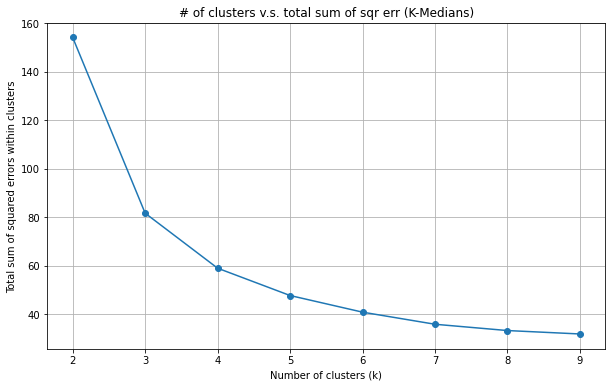

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils.metric import distance_metric, type_metric

# 加载鸢尾花数据集
iris = datasets.load_iris()
data = iris.data

# 考虑的聚类数量范围
K = range(2, 10)

# 存储每个 k 对应的总误差
errors = []

for k in K:
    # 随机选择初始中心点
    np.random.seed(42)  # 固定随机种子以获得可重复的结果
    initial_medians_indices = np.random.choice(len(data), k, replace=False)
    # print(initial_medians_indices)
    initial_medians = data[initial_medians_indices]
    # print(initial_medians)

    # 创建 K-Medians 实例
    # metric = distance_metric(type_metric.EUCLIDEAN)
    # kmedians_instance = kmedians(data, initial_medians, metric=metric)
    kmedians_instance = kmedians(data, initial_medians)

    # 进行聚类
    kmedians_instance.process()

    # 获取聚类误差：这里简单使用中心点更新前后的距离变化总和
    # 在实际情况中，你可能需要更精确地计算总距离或平均距离等
    errors.append(kmedians_instance.get_total_wce())    # .get_total_wce(): returns sum of metric errors that depends on metric that was used for clustering (by default SSE - Sum of Squared Errors)

# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(K, errors,  marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Total sum of squared errors within clusters')
plt.title('# of clusters v.s. total sum of sqr err (K-Medians)')
plt.grid(True)
plt.show()

In [6]:
def transfer_to_index_list(index_lists):
    # 初始化字典
    index_to_value = {}

    # 填充字典
    for group_idx, indexes in enumerate(index_lists):
        for index in indexes:
            index_to_value[index] = group_idx

    # 确定列表的最大长度（最大索引加1）
    max_index = max(index_to_value.keys()) + 1

    # 创建列表并填充
    result_list = [None] * max_index
    for index, value in index_to_value.items():
        result_list[index] = value

    # 由于result_list可能包含None，我们将未指定的值设置为-1，表示不在任何子列表中
    return [-1 if x is None else x for x in result_list]

running time: 0.00477290153503418s
adjusted_rand_score: 0.7436826319432358


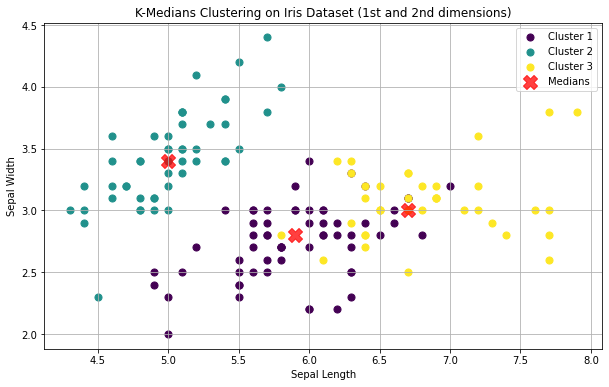

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils.metric import distance_metric, type_metric

# 加载鸢尾花数据集
iris = datasets.load_iris()
data = iris.data

start_time = time.time()

# 设定聚类的数量
k = 3

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medians_indices = np.random.choice(len(data), k, replace=False)
initial_medians = data[initial_medians_indices]

# 创建 K-Medians 实例
# metric = distance_metric(type_metric.EUCLIDEAN)
# kmedians_instance = kmedians(data, initial_medians, metric=metric)
kmedians_instance = kmedians(data, initial_medians)

# 进行聚类
kmedians_instance.process()

# 获取聚类结果
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medians_array = np.array(medians)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = data[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(medians_array[:, 0], medians_array[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medians')
plt.title('K-Medians Clustering on Iris Dataset (1st and 2nd dimensions)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

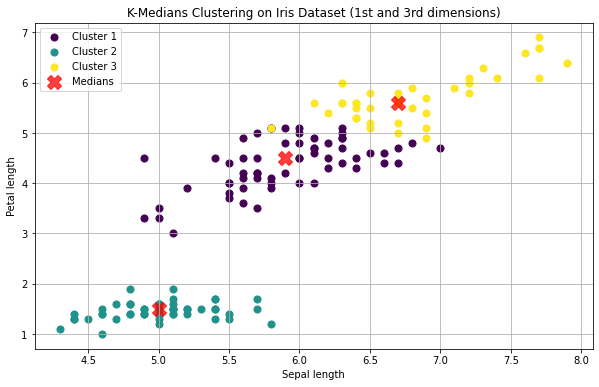

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils.metric import distance_metric, type_metric

# 加载鸢尾花数据集
iris = datasets.load_iris()
data = iris.data

# 设定聚类的数量
k = 3

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medians_indices = np.random.choice(len(data), k, replace=False)
initial_medians = data[initial_medians_indices]

# 创建 K-Medians 实例
# metric = distance_metric(type_metric.EUCLIDEAN)
# kmedians_instance = kmedians(data, initial_medians, metric=metric)
kmedians_instance = kmedians(data, initial_medians)

# 进行聚类
kmedians_instance.process()

# 获取聚类结果
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
medians_array = np.array(medians)

# 设置颜色映射
cmap = plt.get_cmap('viridis')

# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = data[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 2], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(medians_array[:, 0], medians_array[:, 2], c='red', s=200, alpha=0.75, marker='X', label='Medians')
plt.title('K-Medians Clustering on Iris Dataset (1st and 3rd dimensions)')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import pandas as pd

y_twodiamonds = pd.read_csv('../Datasets/TwoDiamonds.csv', usecols=['Class'])
y_twodiamonds = np.array(y_twodiamonds).flatten()

running time: 0.006378889083862305s
adjusted_rand_score: 1.0


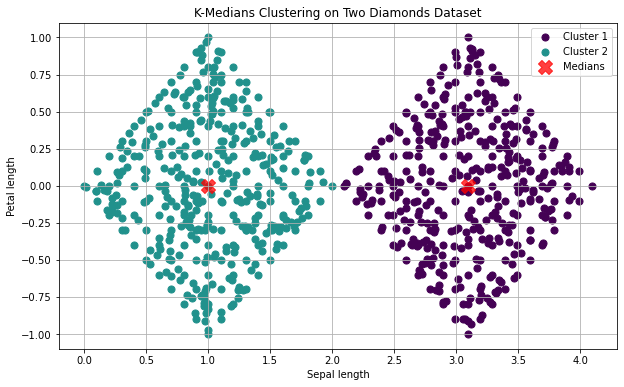

In [10]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = np.array(read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS))

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medians_indices = np.random.choice(len(sample), 2, replace=False)
initial_medians = sample[initial_medians_indices]
kmedians_instance = kmedians(sample, initial_medians)

# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medians_array = np.array(medians)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y_twodiamonds))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = sample[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(medians_array[:, 0], medians_array[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medians')
plt.title('K-Medians Clustering on Two Diamonds Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()
# # Visualize clustering results.
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, sample)
# visualizer.append_cluster(initial_medians, marker='*', markersize=10)
# visualizer.append_cluster(medians, marker='*', markersize=10)
# visualizer.show()

In [11]:
from sklearn.datasets import make_blobs

def get_blobs_with_outlier():
    X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)
    np.random.seed(42)  # 确保生成的离群值是可重复的
    n_outliers = 100
    outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))
    outlier_labels = -1 * np.ones((n_outliers,))
    X = np.vstack([X, outliers])
    y = np.concatenate([y, outlier_labels])
    return (X, y)

get_blobs_with_outlier()

(array([[-1.09510311,  2.76883068],
        [ 1.54632313,  4.212973  ],
        [-1.51086098,  3.02795241],
        ...,
        [-3.21940418, -3.01580851],
        [ 4.51911358,  7.9422052 ],
        [ 7.74172849,  5.59751092]]),
 array([ 2.,  0.,  2., ..., -1., -1., -1.]))

running time: 0.012819051742553711s
adjusted_rand_score: 0.8538175197194927


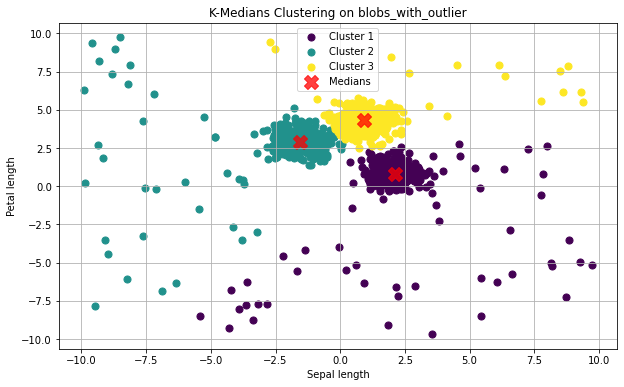

In [12]:
blobs = get_blobs_with_outlier()[0]
blobs_class = get_blobs_with_outlier()[1]

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medians_indices = np.random.choice(len(blobs), 3, replace=False)
initial_medians = blobs[initial_medians_indices]

kmedians_instance = kmedians(blobs, initial_medians)
# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medians_array = np.array(medians)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), blobs_class))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = blobs[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(medians_array[:, 0], medians_array[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medians')
plt.title('K-Medians Clustering on blobs_with_outlier')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def get_blobs():
    X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0) 
    return (X, y)

running time: 0.012037038803100586s
adjusted_rand_score: 0.9940030000150241


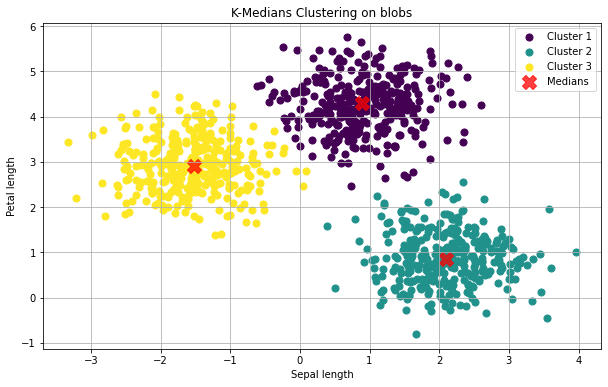

In [14]:
blobs = get_blobs()[0]
blobs_class = get_blobs()[1]

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medians_indices = np.random.choice(len(blobs), 3, replace=False)
initial_medians = blobs[initial_medians_indices]

kmedians_instance = kmedians(blobs, initial_medians)
# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medians_array = np.array(medians)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), blobs_class))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = blobs[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(medians_array[:, 0], medians_array[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medians')
plt.title('K-Medians Clustering on blobs')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import pandas as pd

y_engytime = pd.read_csv('../Datasets/EngyTime.csv', usecols=['Class'])
y_engytime = np.array(y_engytime).flatten()

X = pd.read_csv('../Datasets/EngyTime.csv', usecols=['X1', 'X2'])
X = np.array(X)
X

array([[ 1.388261,  2.076096],
       [ 2.177247,  3.102304],
       [ 0.378645,  5.30761 ],
       ...,
       [ 1.078797,  1.526153],
       [ 1.974889, -0.649343],
       [-0.127192, -0.763974]])

running time: 0.08266425132751465s
adjusted_rand_score: 0.8088991335412533


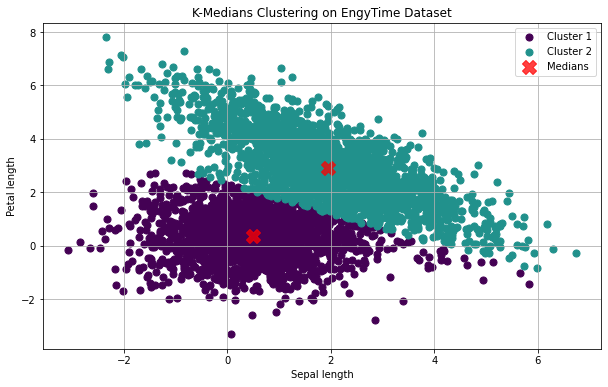

In [16]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Load list of points for cluster analysis.
sample = pd.read_csv('../Datasets/EngyTime.csv', usecols=['X1', 'X2'])
sample = np.array(sample)

start_time = time.time()

# 随机选择初始中心点
np.random.seed(42)  # 设置随机种子以获得可重复结果
initial_medians_indices = np.random.choice(len(sample), 2, replace=False)
initial_medians = sample[initial_medians_indices]
kmedians_instance = kmedians(sample, initial_medians)

# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"running time: {elapsed_time}s")

medians_array = np.array(medians)

# 展示聚类的rand score
print('adjusted_rand_score:', adjusted_rand_score(transfer_to_index_list(clusters), y_engytime))

# 设置颜色映射
cmap = plt.get_cmap('viridis')
# 可视化结果
plt.figure(figsize=(10, 6))
for idx, cluster in enumerate(clusters):
    cluster_points = sample[cluster]
    color = cmap(idx/(k - 1))  # 标准化索引并获取颜色
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=[color], marker='o', label=f'Cluster {idx+1}')

plt.scatter(medians_array[:, 0], medians_array[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Medians')
plt.title('K-Medians Clustering on EngyTime Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.grid(True)
plt.show()